In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

import datetime

from tensorflow import keras
import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [111]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1

In [112]:
if model_type == 'NN':
    parameters = {'n_layers': 1, 'n_hidden_units': 82, 'batch_size': 2809, 'epochs': 10} # rmse = 1.699, r2 = 0.9983
    #parameters = {'n_layers': 1, 'n_hidden_units': 46, 'batch_size': 4298} # rmese = 2.06, r2 = 0.9976
elif model_type == 'XGBoost':
    parameters = {'learning_rate': 0.06600212850505194, 'subsample': 0.6242681848206246, 'colsample_bytree': 0.7982472652709917, 'num_boost_round': 160} # rmse = 4.5927
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 150, 'max_depth': 64, 'max_samples': 0.8785156026362354}

In [113]:
if scale:
    model, val_index, scaler_x, scaler_y = final_train(data_dir, model_type, target, scale, parameters)
else:
    model, val_index = final_train(data_dir, model_type, target, scale, parameters)

Epoch 1/10
856/856 [==============================] - 2s 2ms/step - loss: 0.1225 - val_loss: 0.0020
Epoch 2/10
856/856 [==============================] - 1s 1ms/step - loss: 0.0016 - val_loss: 9.2922e-04
Epoch 3/10
856/856 [==============================] - 1s 2ms/step - loss: 7.8603e-04 - val_loss: 5.2745e-04
Epoch 4/10
856/856 [==============================] - 1s 1ms/step - loss: 4.7049e-04 - val_loss: 3.2939e-04
Epoch 5/10
856/856 [==============================] - 1s 1ms/step - loss: 2.9687e-04 - val_loss: 2.1090e-04
Epoch 6/10
856/856 [==============================] - 1s 2ms/step - loss: 1.9031e-04 - val_loss: 1.3252e-04
Epoch 7/10
856/856 [==============================] - 1s 2ms/step - loss: 1.1644e-04 - val_loss: 8.6997e-05
Epoch 8/10
856/856 [==============================] - 1s 2ms/step - loss: 8.0235e-05 - val_loss: 6.7107e-05
Epoch 9/10
856/856 [==============================] - 1s 2ms/step - loss: 6.1996e-05 - val_loss: 5.2315e-05
Epoch 10/10
856/856 [===================

In [114]:
sv = False
ld = False

In [115]:
if sv:
    if model_type == 'NN':
        model.save("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H"))
    elif model_type == 'XGBoost':
        model.save_model("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H") + ".json")
elif ld:
    if model_type == 'NN':
        model = keras.models.load_model("../models/NN_20220701-19")
    elif model_type == 'XGBoost':
        model = xgb.Booster()
        model.load_model("../models/XGBoost_20220707-12.json")

In [116]:
if scale:
    results = validate_model(model, model_type, data_dir, val_index, target, scale, scaler_x, scaler_y)
else:
    results = validate_model(model, model_type, data_dir, val_index, target, scale)

RMSE: 1.6635, R2: 0.9988


In [117]:
val_df = results['val_df']

ValueError: x and y must have same first dimension, but have shapes (3621,) and (72000,)

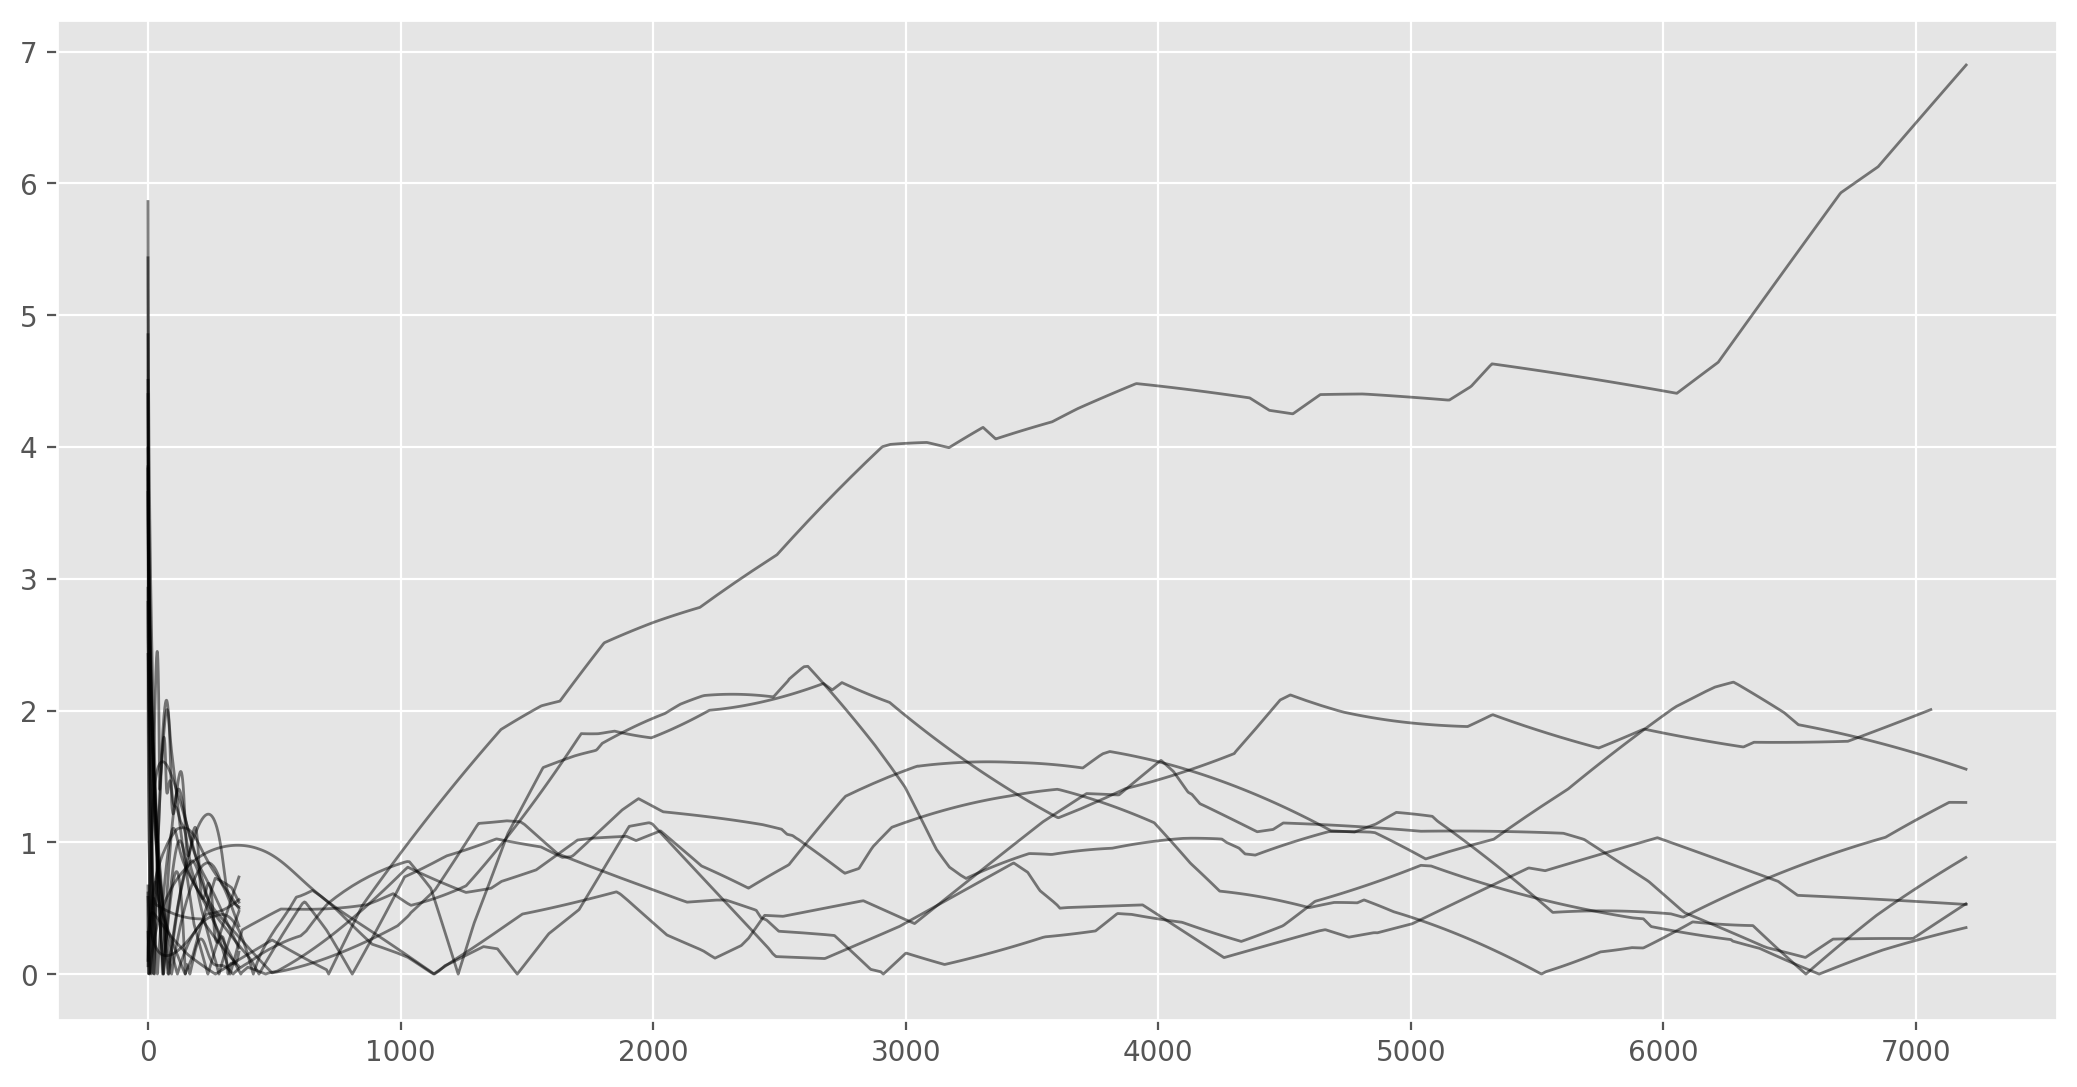

In [118]:
avg_error = plot_average_error(val_df, target=target)

<AxesSubplot:>

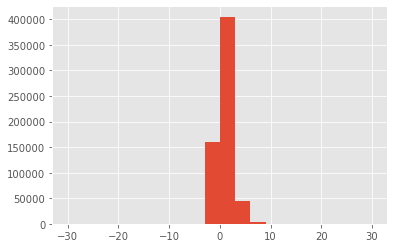

In [119]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

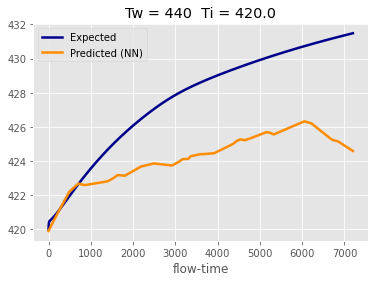

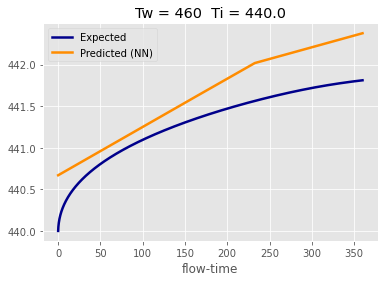

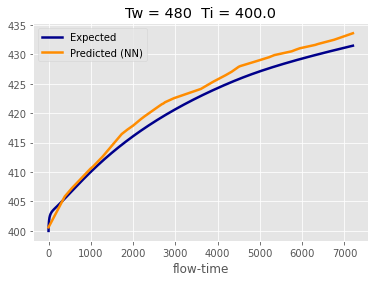

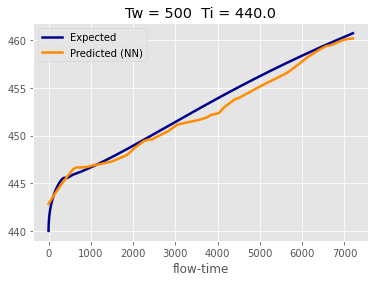

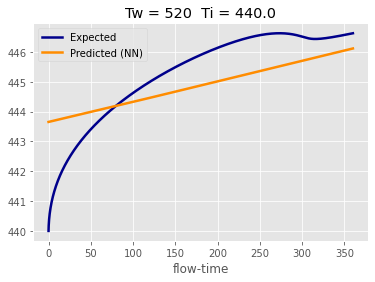

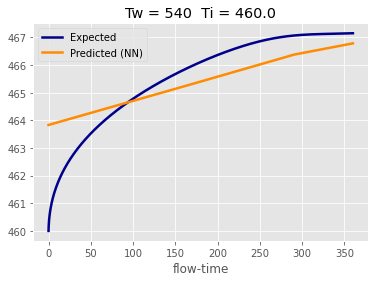

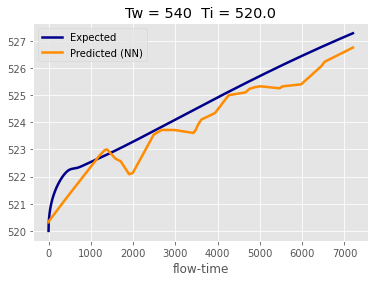

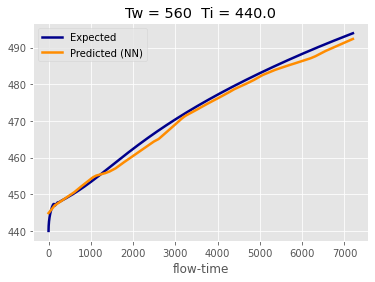

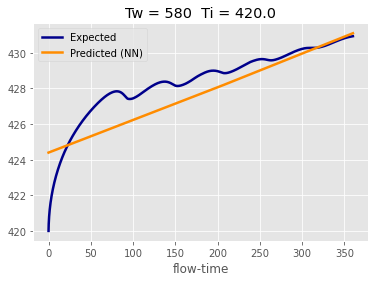

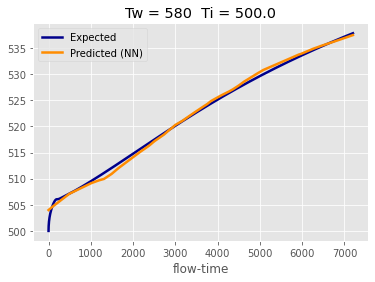

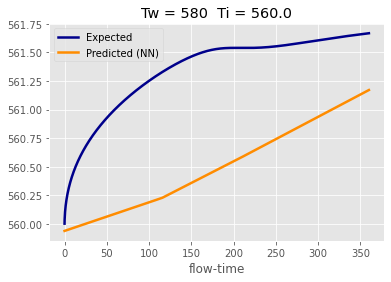

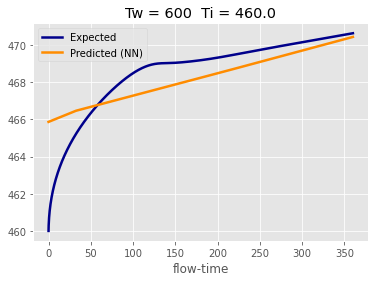

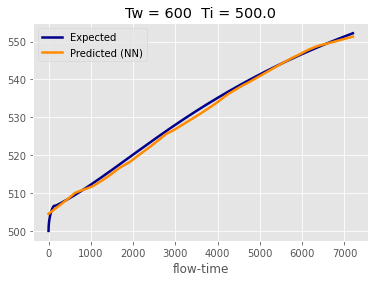

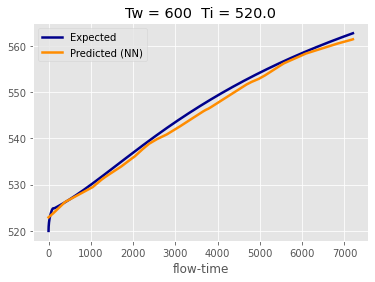

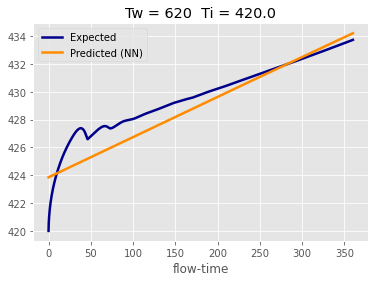

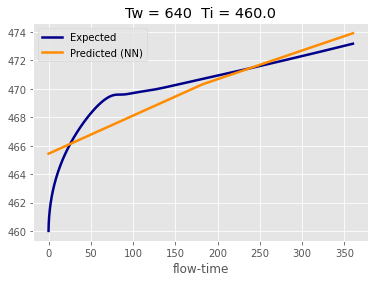

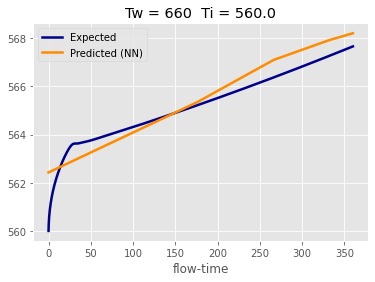

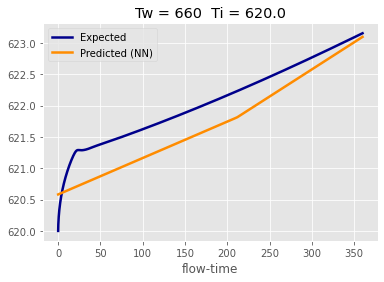

In [120]:
plot_test_results(val_df, model_type, target)

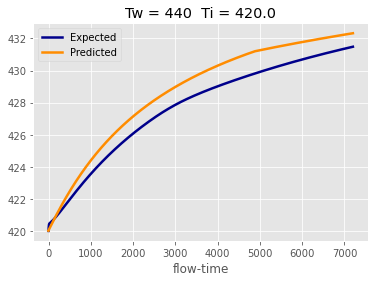

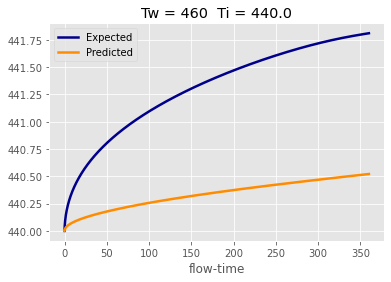

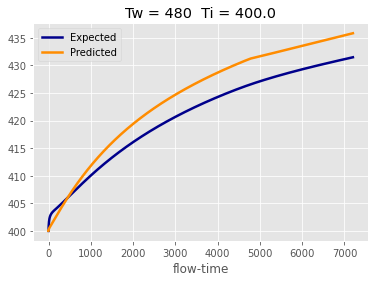

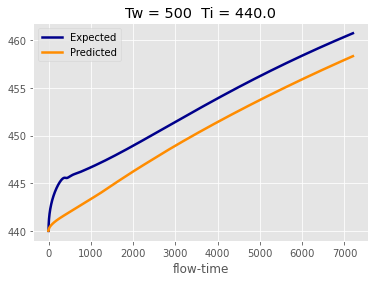

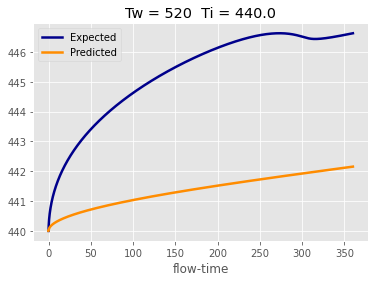

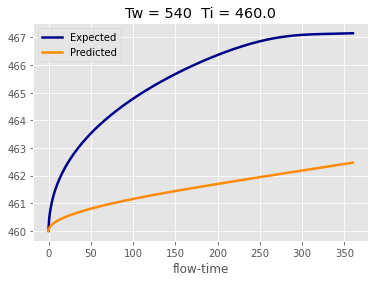

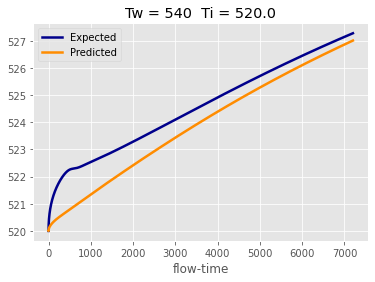

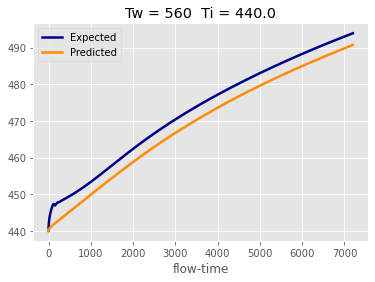

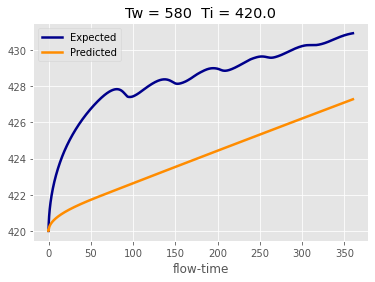

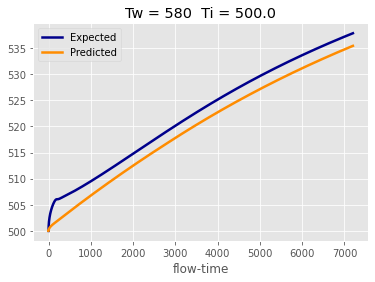

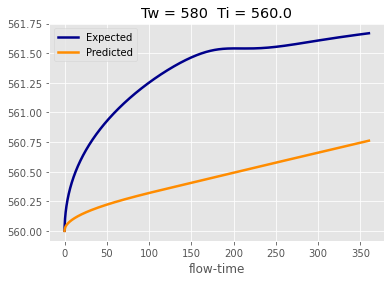

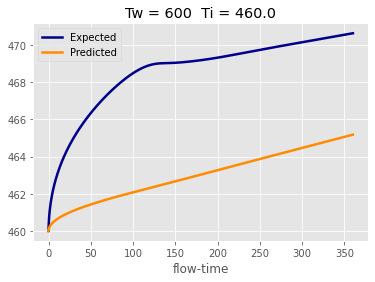

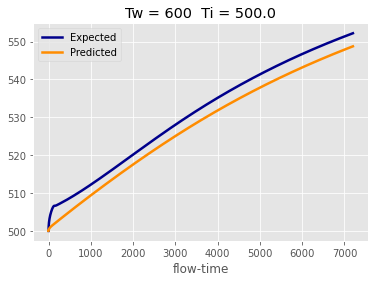

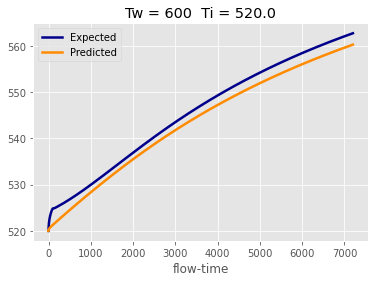

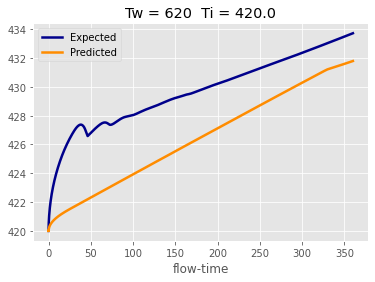

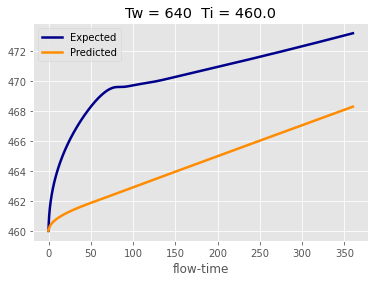

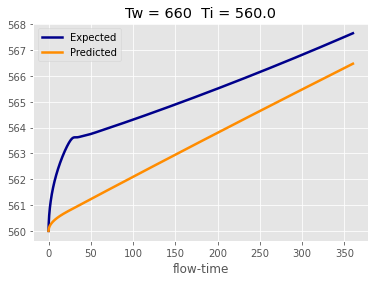

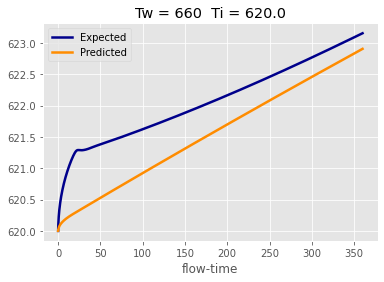

In [99]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(val_df, plot=True)

In [48]:
print(rmse)

2.7846958265553967


In [49]:
print(r2)

0.9983949425418629
